In [0]:
import numpy as np
# NEXT LINE ONLY FOR COLAB!
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
# COMMENT OUT THIS LINE FOR COLAB!
#%matplotlib notebook

In [0]:
print(tf.__version__)

2.0.0


### Understanding tensors and arrays.

In [0]:
# A NumPy array is an arbitray dimensional matrix to store numbers in
arr = np.reshape(np.arange(9),(3,3))
print(arr)
print(arr.shape)
print("------------------")

# Access dimensions of the shape.
print(arr.shape[0])
print(arr.shape[-1])
print("------------------")

# Reshaping an array.
arr1 = np.reshape(arr, newshape=(9,1))
print(arr1)
arr2 = np.reshape(arr, newshape=(-1,1)) # The -1 makes numpy infer itself the missing dimension.
print(arr2)
print("------------------")

# Indexing allows you to access specific entries of an array.
print(arr[2,1]) # row 2 (third), column 1 (second).
print(arr[1,2]) # row 1 (second), column 2 (third).
print("------------------")

# Slicing allows you to retrieve parts of an array.
print(arr[:,1]) # All rows, collumn 1.
print(arr[0:2,:]) # Rows from 0 (include) to 2 (exclude), all columns. 

[[0 1 2]
 [3 4 5]
 [6 7 8]]
(3, 3)
------------------
3
3
------------------
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]]
------------------
7
5
------------------
[1 4 7]
[[0 1 2]
 [3 4 5]]


In [0]:
# Thinking in matrices should be familiar from intro math course. 
# But the exact same things work in higher dimensions!
arr = np.reshape(np.arange(27), (3,3,3))
print(arr)
print(arr.shape)
print("------------------")

# Indexing.
print(arr[0,1,2])
print("------------------")

# Slicing.
print(arr[:,2,:])

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
(3, 3, 3)
------------------
5
------------------
[[ 6  7  8]
 [15 16 17]
 [24 25 26]]


In [0]:
# A tensor is basically the same as an array. And it isn't.
# Strictly spreaking tensors are operations. 
# You can't simply convert a numpy array to a tensor.
#tensor = tf.Tensor(arr)

In [0]:
# But if you define a tensor as an operation, the tensor will store
# the corresponding result of this operation.
tensor = tf.multiply(42, arr)
print(arr)
print(tensor)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
tf.Tensor(
[[[   0   42   84]
  [ 126  168  210]
  [ 252  294  336]]

 [[ 378  420  462]
  [ 504  546  588]
  [ 630  672  714]]

 [[ 756  798  840]
  [ 882  924  966]
  [1008 1050 1092]]], shape=(3, 3, 3), dtype=int32)


In [0]:
# If your variable is a tensor you can use all the normal math 
# operators as '+','-','*','/' and so on.
print(tensor/42)
print(tf.divide(tensor,42)) # That's the same thing.
print(tensor/42+tensor/42)

tf.Tensor(
[[[ 0.  1.  2.]
  [ 3.  4.  5.]
  [ 6.  7.  8.]]

 [[ 9. 10. 11.]
  [12. 13. 14.]
  [15. 16. 17.]]

 [[18. 19. 20.]
  [21. 22. 23.]
  [24. 25. 26.]]], shape=(3, 3, 3), dtype=float64)
tf.Tensor(
[[[ 0.  1.  2.]
  [ 3.  4.  5.]
  [ 6.  7.  8.]]

 [[ 9. 10. 11.]
  [12. 13. 14.]
  [15. 16. 17.]]

 [[18. 19. 20.]
  [21. 22. 23.]
  [24. 25. 26.]]], shape=(3, 3, 3), dtype=float64)
tf.Tensor(
[[[ 0.  2.  4.]
  [ 6.  8. 10.]
  [12. 14. 16.]]

 [[18. 20. 22.]
  [24. 26. 28.]
  [30. 32. 34.]]

 [[36. 38. 40.]
  [42. 44. 46.]
  [48. 50. 52.]]], shape=(3, 3, 3), dtype=float64)


In [0]:
# You can also easily convert a tensor back to nunpy.
print(tensor.numpy())

[[[   0   42   84]
  [ 126  168  210]
  [ 252  294  336]]

 [[ 378  420  462]
  [ 504  546  588]
  [ 630  672  714]]

 [[ 756  798  840]
  [ 882  924  966]
  [1008 1050 1092]]]


### Create a simple regression dataset (Backpropagation lecture).

(-0.05, 0.6)

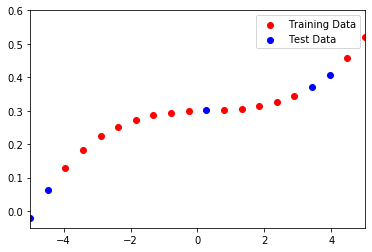

In [0]:
xs = np.linspace(-5,5, 20, dtype=np.float32)
def f(x):
    return 0.002*(x**3-x**2+2*x)+0.3
ys = np.array([f(x) for x in xs], dtype=np.float32)

training_data_ids = np.random.choice(20,15, replace=False)
test_data_ids = np.array([i if i not in training_data_ids else 99 for i in range(20)])
test_data_ids = test_data_ids[test_data_ids < 21]
training_data_xs = xs[training_data_ids]
training_data_ys = ys[training_data_ids]
test_data_xs = xs[test_data_ids]
test_data_ys = ys[test_data_ids]

plt.scatter(training_data_xs, training_data_ys, c='red')
plt.scatter(test_data_xs, test_data_ys, c='blue')
plt.legend(("Training Data","Test Data"))
plt.xlim(-5,5)
plt.ylim(-0.05,0.6)

In [0]:
# First understand the shape that your data has.
print(training_data_xs.shape)
print(training_data_ys.shape)
print(test_data_xs.shape)
print(test_data_ys.shape)

(15,)
(15,)
(5,)
(5,)


In [0]:
# It is easiest to use this dataset with TensorFlow by converting
# it to a tf.data.Dataset (https://www.tensorflow.org/api_docs/python/tf/data/Dataset).
# If, as in our case, you want to convert Numpy Arrays into a dataset
# use tf.data.Dataset.from_tensor_sclices
train_dataset = tf.data.Dataset.from_tensor_slices((training_data_xs, training_data_ys))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_xs, test_data_ys))

# You can easily iterate over a dataset.
# You see that the test dataset has 5 samples, each represented
# by a tuple that contains the input and the target value.
for elem in test_dataset:
    print(elem)
print("------------------")

# If we want to feed in the whole dataset at once, because
# we want to minimize the loss function for the whole dataset
# we have to batch it. Now the samples are stored in two arrays:
# one for the inputs, one for the targets.
train_dataset = train_dataset.batch(15)
test_dataset = test_dataset.batch(5)
for elem in test_dataset:
    print(elem)    

(<tf.Tensor: id=123275, shape=(), dtype=float32, numpy=-5.0>, <tf.Tensor: id=123276, shape=(), dtype=float32, numpy=-0.02>)
(<tf.Tensor: id=123277, shape=(), dtype=float32, numpy=-4.4736843>, <tf.Tensor: id=123278, shape=(), dtype=float32, numpy=0.06300625>)
(<tf.Tensor: id=123279, shape=(), dtype=float32, numpy=0.2631579>, <tf.Tensor: id=123280, shape=(), dtype=float32, numpy=0.3009506>)
(<tf.Tensor: id=123281, shape=(), dtype=float32, numpy=3.4210527>, <tf.Tensor: id=123282, shape=(), dtype=float32, numpy=0.3703543>)
(<tf.Tensor: id=123283, shape=(), dtype=float32, numpy=3.9473684>, <tf.Tensor: id=123284, shape=(), dtype=float32, numpy=0.4076396>)
------------------
(<tf.Tensor: id=123296, shape=(5,), dtype=float32, numpy=
array([-5.       , -4.4736843,  0.2631579,  3.4210527,  3.9473684],
      dtype=float32)>, <tf.Tensor: id=123297, shape=(5,), dtype=float32, numpy=
array([-0.02      ,  0.06300625,  0.3009506 ,  0.3703543 ,  0.4076396 ],
      dtype=float32)>)


### Build a simple network.

In [0]:
from tensorflow.keras.layers import Layer

# Let' start with a simple linear layer, which basically only 
# computes the drive. No activation function.

# You define a class for a layer. This class inherits from the 
# general "Layer" class.

class Linear(Layer):
    """y = w.x + b"""
    
    # In the init-function you call the init of the super class "Layer".
    # You do not need to understand what the init of the super class does.
    # You then specify which parameters your specific layer requires.
    def __init__(self, units):
        super(Linear, self).__init__()
        # A simple linear layer only requires the number of 
        # "output" neurons.
        self.units = units
        
    # In the build function you define which variables your layer
    # has. In our case this is the weight matrix and the bias
    # vector.
    # The "input_shape" variable allows you to dynamically define
    # how many columns the weight matrix needs.
    # The initializer defines how the random values are initialized 
    # in the beginning.
    # With the trainable argument you can specify whether you want the parameters
    # to be updated during training.
    def build(self, input_shape):
        self.w = self.add_weight(
                        shape=(input_shape[-1], self.units),
                        initializer=tf.random_normal_initializer(),
                        trainable=True
        )
        self.b = self.add_weight(
                        shape=(self.units,),
                        initializer=tf.random_normal_initializer(),
                        trainable=True
        )
     
    # In the call function you define what the layer should
    # return based on the given "inputs".
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [0]:
# Now let's see how to use such a layer.
# First you have to instantiate it. Let's build a simple layer
# with 4 output neurons.

linear_layer = Linear(4)

# Now we can call it and run it on some input.
x = tf.ones((1,4))
print(x)
y = linear_layer(x)
print(y)

tf.Tensor([[1. 1. 1. 1.]], shape=(1, 4), dtype=float32)
tf.Tensor([[-0.01286331 -0.0310143  -0.04059295 -0.03772472]], shape=(1, 4), dtype=float32)


In [0]:
# We can stack multiple layers onto another to build a deep
# neural network. Let' start with a simple MLP with one
# hidden layer.

# Formally we define another layer. So we have to inherit again.
class MLP(Layer):
    
    def __init__(self):
        # And also call the super init again.
        super(MLP, self).__init__()
        # Here we only instantiate the layers that our network has.
        self.hidden_layer = Linear(512)
        self.output_layer = Linear(1)
        
    # In the call function we define the forward pass of the network.
    # ReLU is just a different activation function that we will learn
    # about in the next lecture.
    def call(self, x):
        x = self.hidden_layer(x)
        x = tf.nn.relu(x)
        x = self.output_layer(x)
        return x

### Train a network.

In [0]:
# Before you instantiate a new network it might be helpful to 
# clear the session to get rid of everything that might be
# stored in the background.
tf.keras.backend.clear_session()

# Here we instantiate the above defined MLP.
mlp = MLP()

# Now lastly before we can start with the training we have to 
# define which loss function and optimizer to use. 
# instantiate loss function.
# Losses can be found here: https://www.tensorflow.org/api_docs/python/tf/keras/losses.
mse = tf.keras.losses.MeanSquaredError()
# Optimizers here: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers.
# 1e-2 = 0.01.
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)

In [0]:
# Here we define some lists to store the training progress.
train_losses = []
test_losses = []
epochs = []

# One epoch means running through the whole dataset once. 
# As we do full batch updates this means we only have on training
# step per epoch. Thus we need many epochs.
for epoch in range(1000):
    epochs.append(epoch)
    
    # Training loop.
    for (x,y) in train_dataset:
        
        # We have to reshape the input. The input has shape (15,)
        # because we have 15 samples. But if we feed it like that
        # the network thinks we feed in one 15-dimensional input. We want 15
        # 1-dimensional inputs, which would be shape (15,1). 
        # In general the shape of an input should be (batch_size, input_dimension).
        x = tf.reshape(x, shape=(-1,1))
        
        # We want TensorFlow to automatically compute the gradients
        # for our network. This means we have to start a gradient
        # tape to start recording before we feed the data through
        # the network.
        with tf.GradientTape() as tape:
            output = mlp(x)
            loss = mse(y, output)
            train_losses.append(loss)
            gradients = tape.gradient(loss, mlp.trainable_variables)
        
        # After recording the gradients we can apply them to the 
        # variables.
        optimizer.apply_gradients(zip(gradients, mlp.trainable_variables))        
    
    # Test loop. 
    for (x,y) in test_dataset:
        x = tf.reshape(x, shape=(-1,1))
        output = mlp(x)
        loss = mse(y, output)       
        test_losses.append(loss)

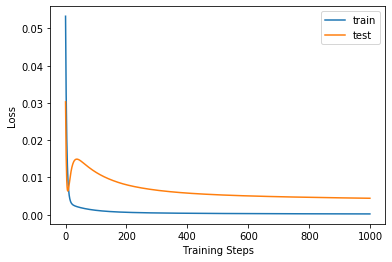

In [0]:
# Let's visualize the training progress
plt.figure()
plt.plot(epochs, train_losses)
plt.plot(epochs, np.array(test_losses))
plt.legend(("train","test"))
plt.xlabel("Training Steps")
plt.ylabel("Loss")
plt.show()

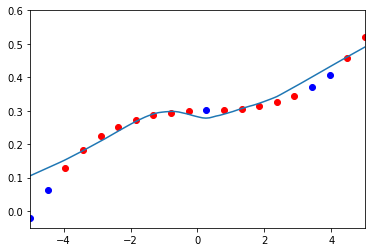

In [0]:
# Lastly let's visualize the resulted approximation of the network. 

# Plot training and test data.
plt.figure()
plt.scatter(training_data_xs, training_data_ys, c='red')
plt.scatter(test_data_xs, test_data_ys, c='blue')

# Calculate the network's output for 100 xs.
xs = np.linspace(-5,5,100, dtype=np.float32)
xs = np.reshape(xs, newshape=(-1,1))
ys = mlp(xs)

# Plot it.
plt.plot(xs,ys)
plt.xlim(-5,5)
plt.ylim(-0.05,0.6)
plt.show()